# Grid World

In [1]:
import numpy as np
from grid_world import *
%matplotlib inline

<br>
## Introduction to Grid World game

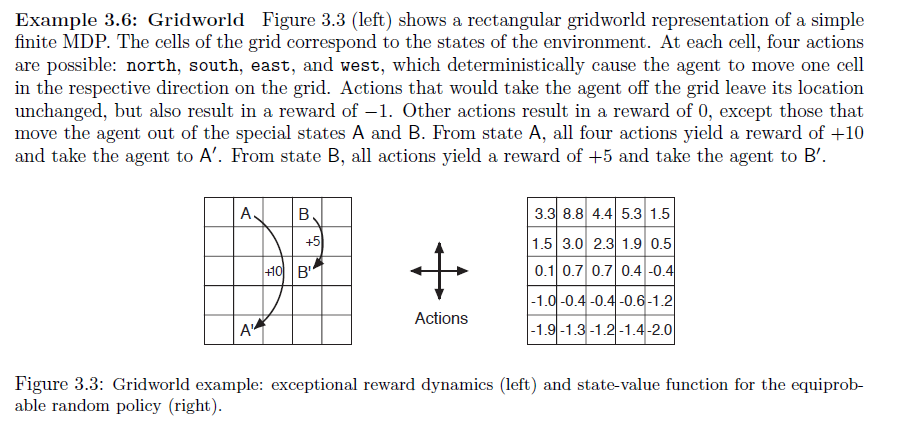
**copied from Reinforcement Learning: An Introduction**

<br>
## Let's see how the value of each state changes!

In [11]:
game = GridWorld()

In [12]:
game.WORLD_SIZE

5

In [13]:
game.ACTIONS

[array([ 0, -1]), array([-1,  0]), array([0, 1]), array([1, 0])]

In [14]:
game.DISCOUNT

0.9

In [15]:
game.A_POS

[0, 1]

In [16]:
game.B_POS

[0, 3]

<br>
## Update value of each state using bellman equation

Bellman equation is defined as follows:
\begin{equation*}
v_\pi = \sum_{a} \pi(a|s) \sum_{s',r}p(s',r|s,a)[r + \gamma v_\pi(s')]
\end{equation*}
--rl book(3.14)

In the case of GridWorld, p(sâ€²,r|s,a) is always 1, when we are under state s and taking action a. Since the rule of game is deterministic, taking a specific action under a specific state will only lead to one state s' and gain reward r. 
Then the equation becomes:
\begin{equation*}
v_\pi = \sum_{a} \pi(a|s) [r + \gamma v_\pi(s')]
\end{equation*}
<br>
This equation is the one used in function **ValueUpdateBellman()**, or **figure_3_2()** in the original code


In [17]:
game.ValueUpdateBellman()

Value function converges after 16 loops


_Read from buttom to top, the buttom one is the first value update and the top one is the last value update_
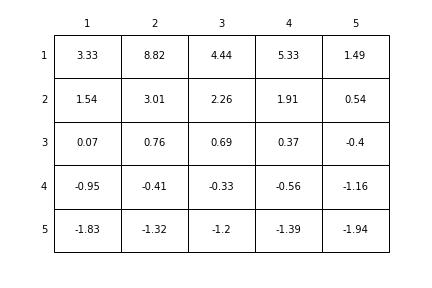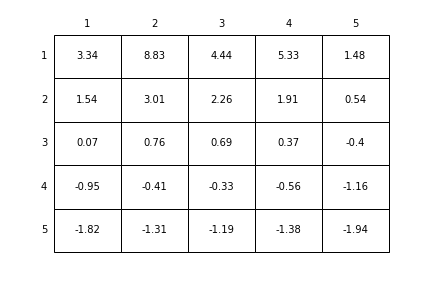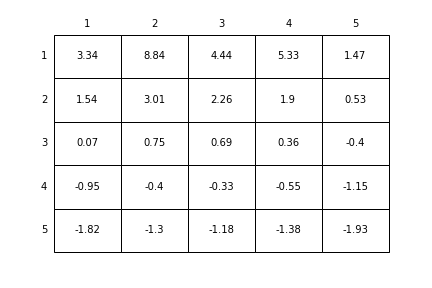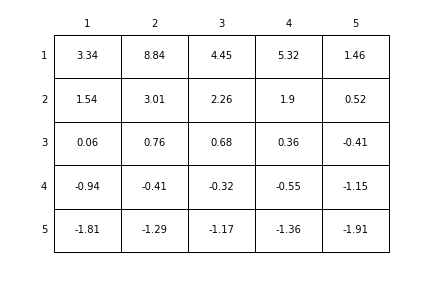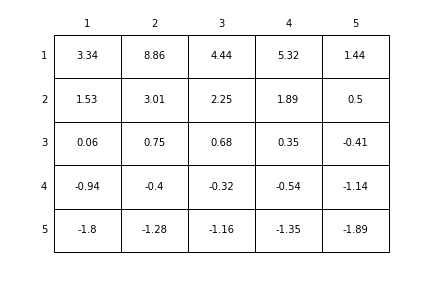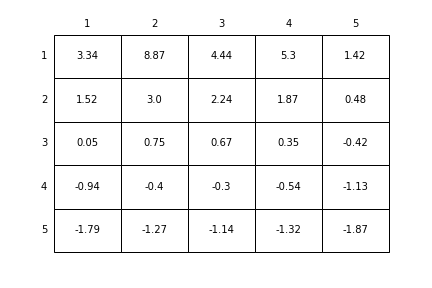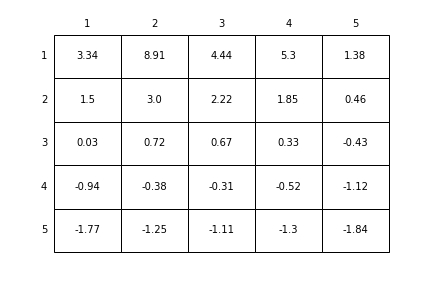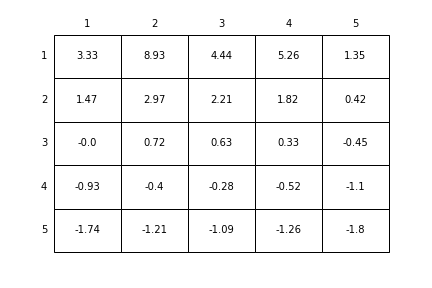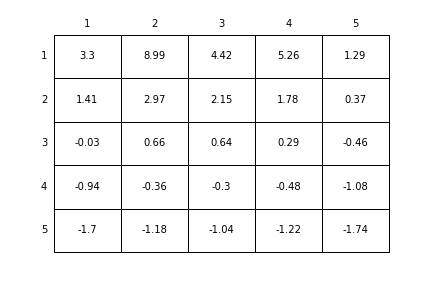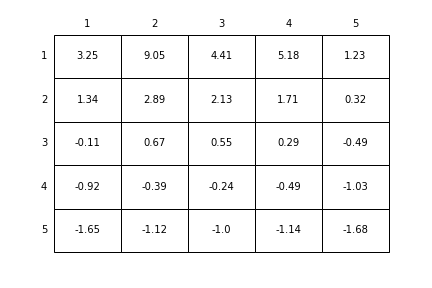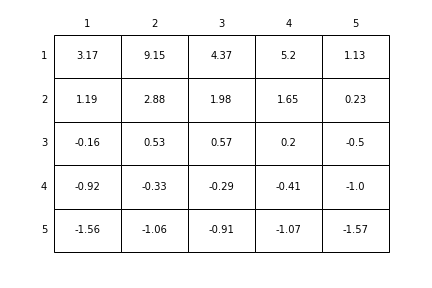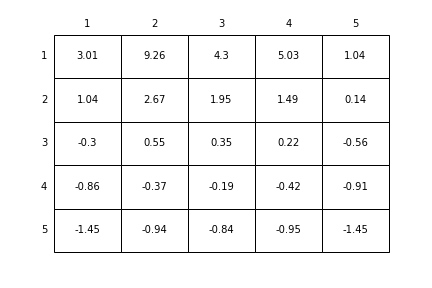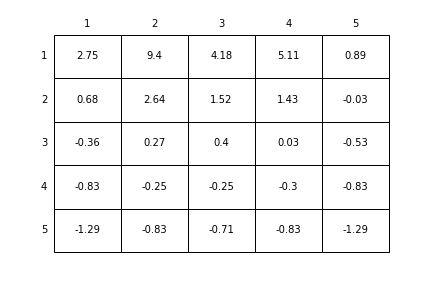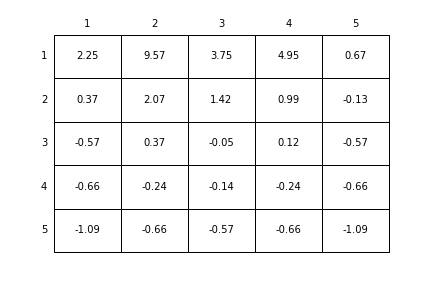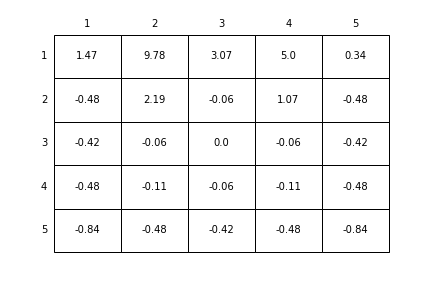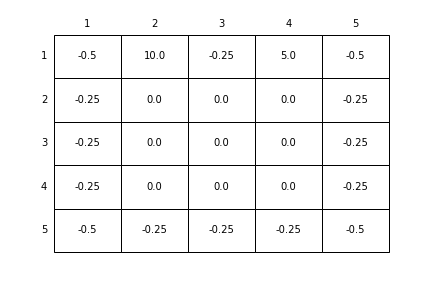

## Optimal Value Functions for Grid World

\begin{equation*}
v_* = \max_{a} \sum_{s',r} p(s',r|s,a) [r + \gamma v_*]
\end{equation*}
<br>
p(s',r|s,a) is always 1 as the environment is deterministic.

In [18]:
game.OptimalValueUpdate()

Optimal value function is obtained after 58 loops


_Read from buttom to top, the buttom one is the first value update and the top one is the last value update_
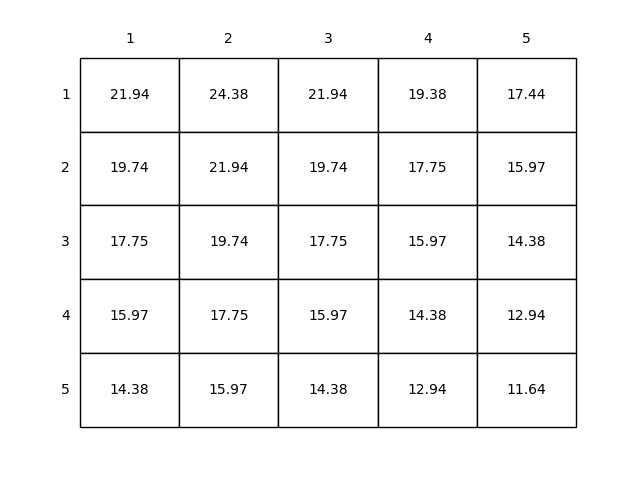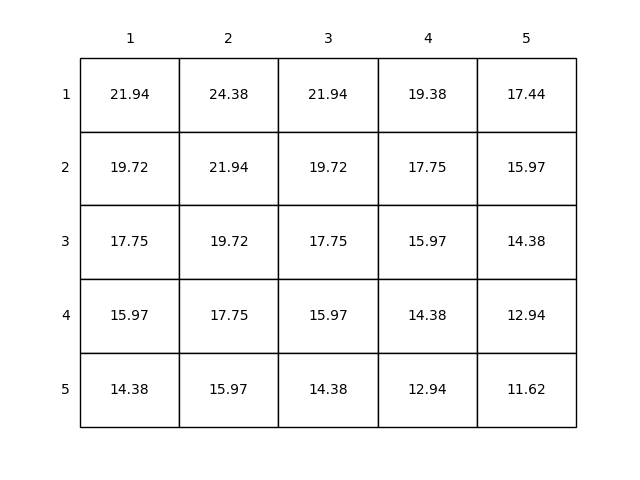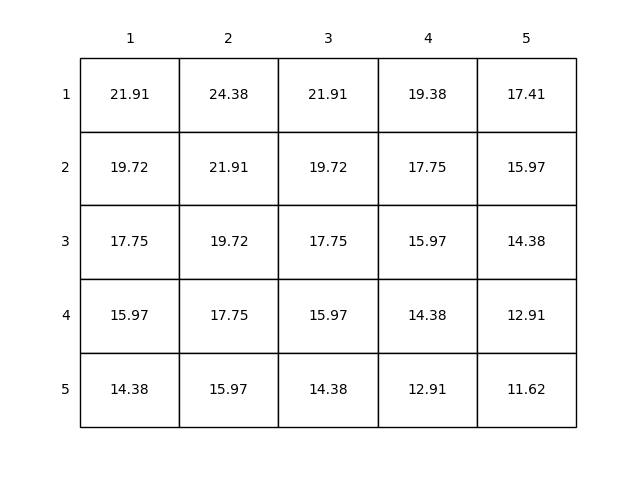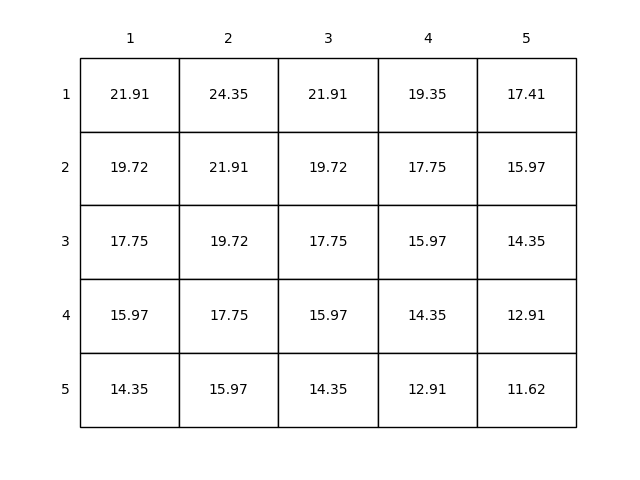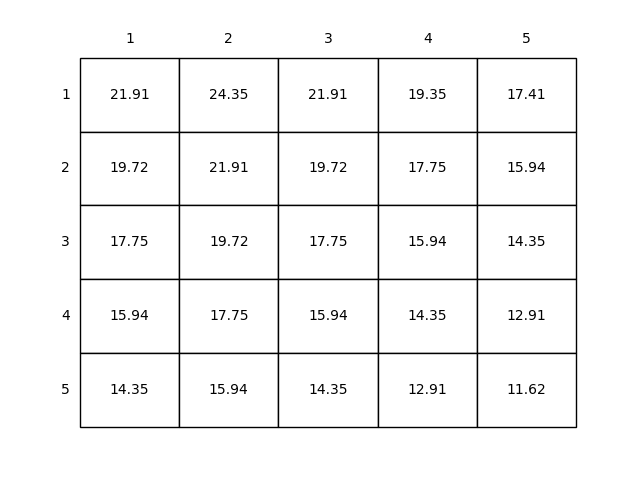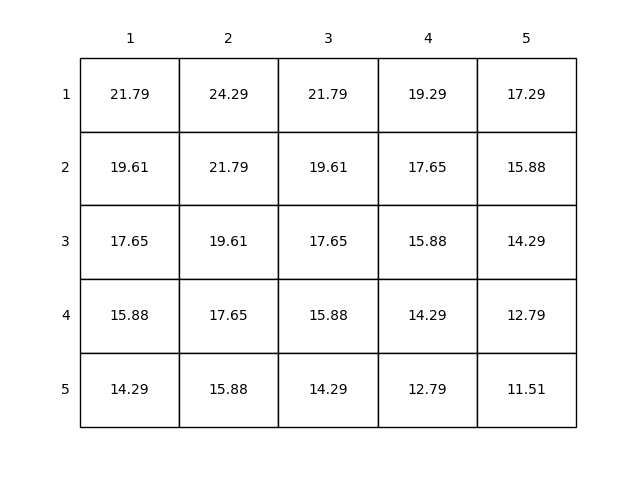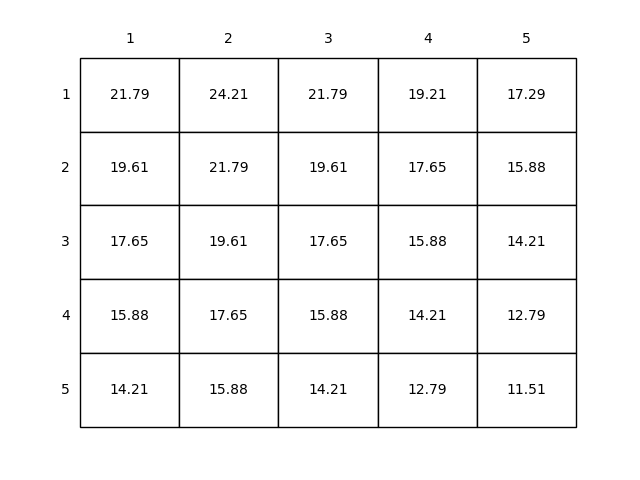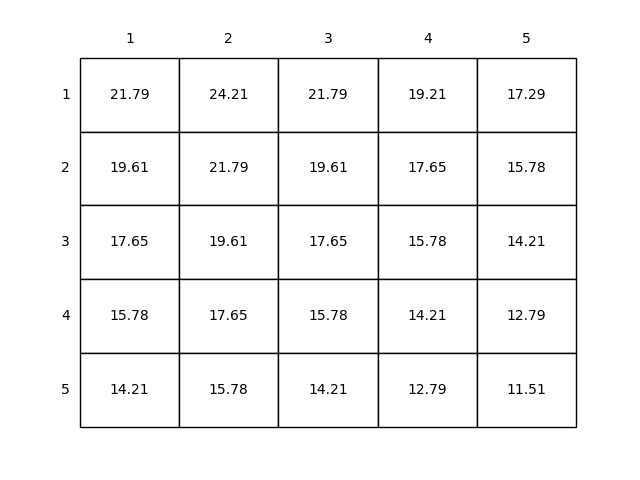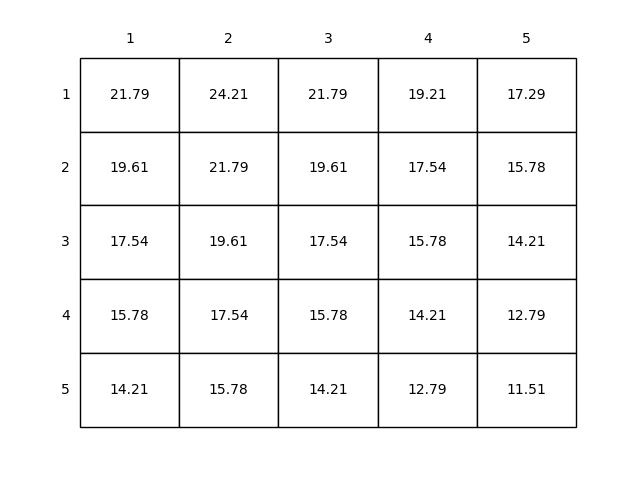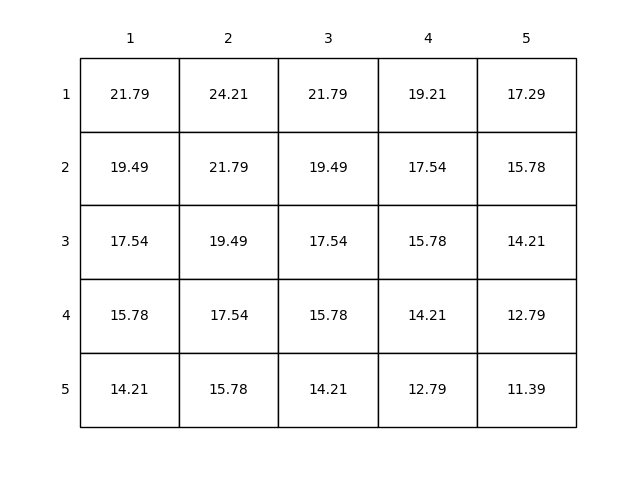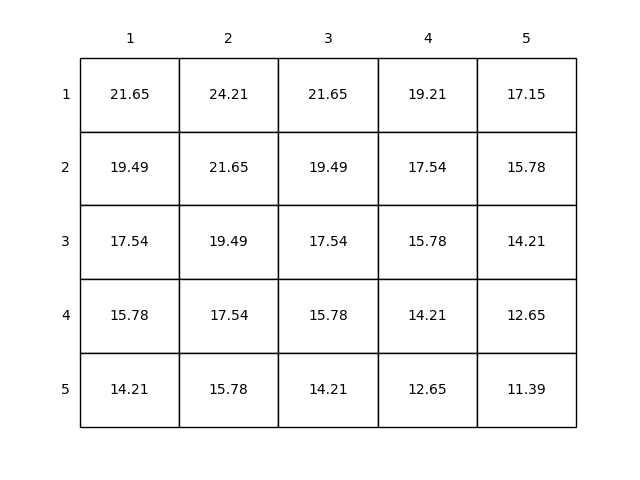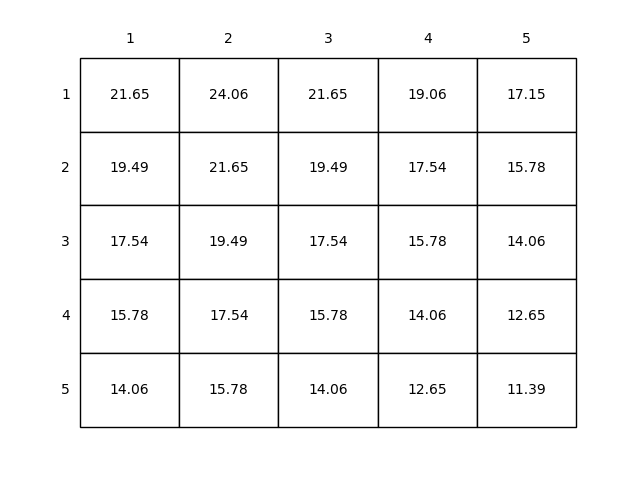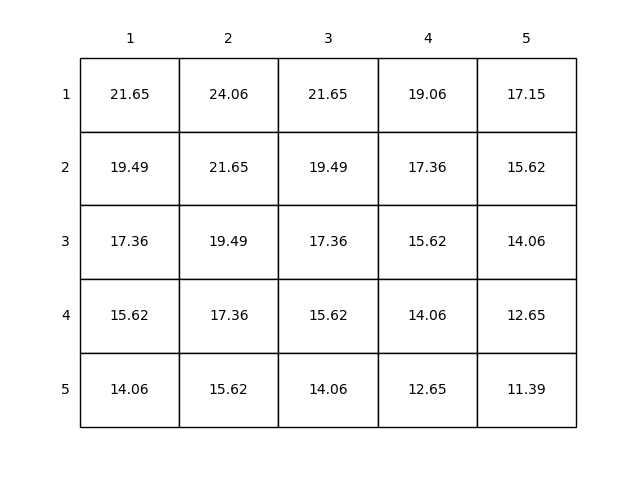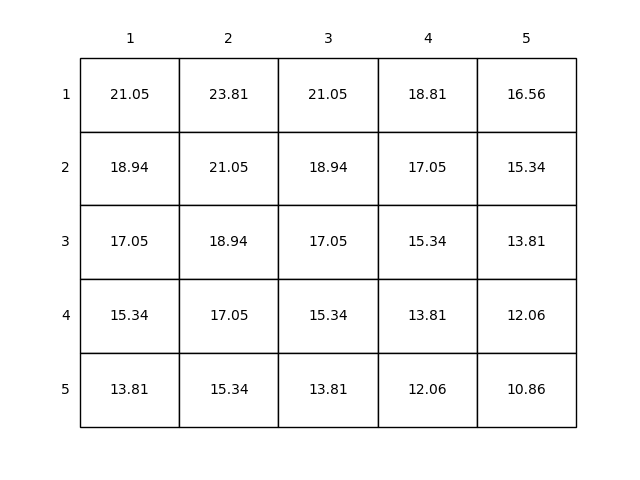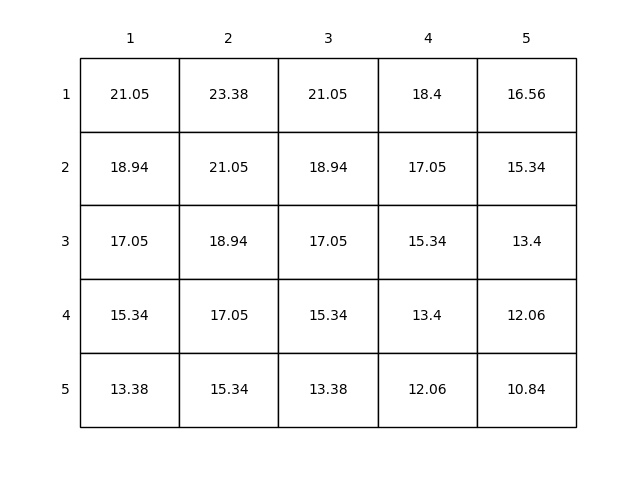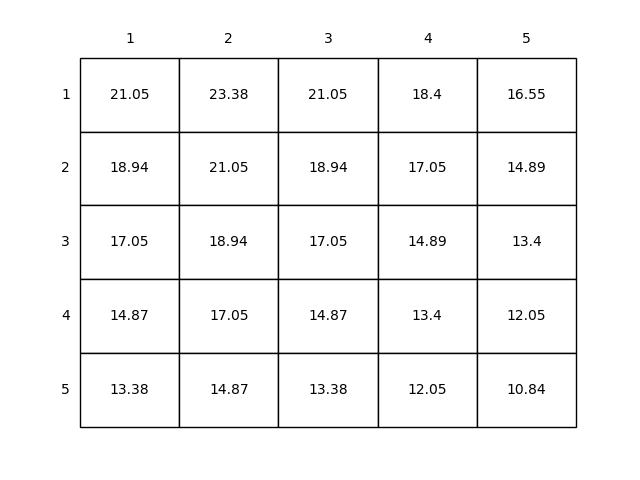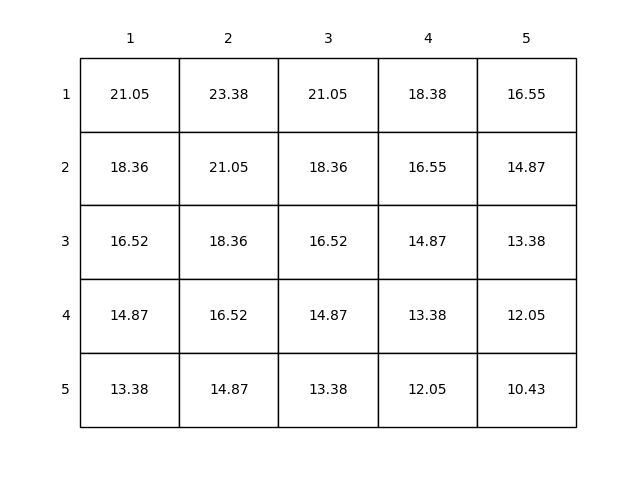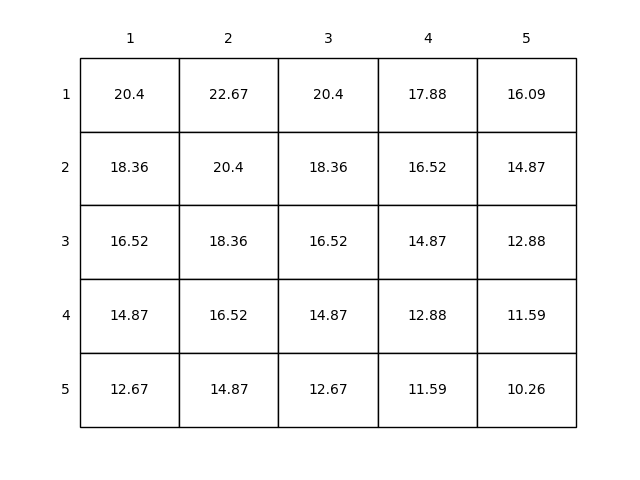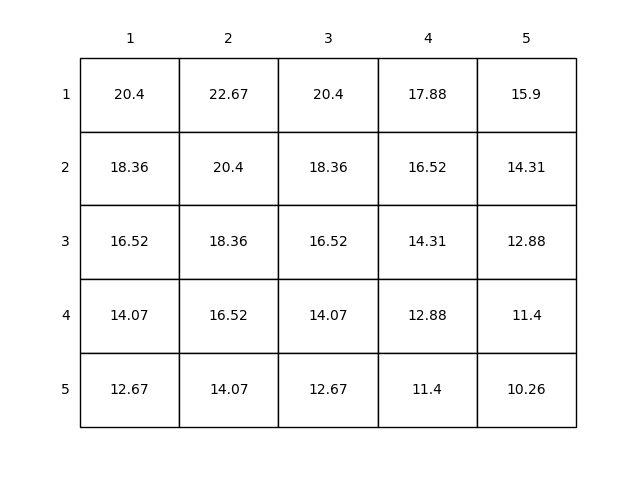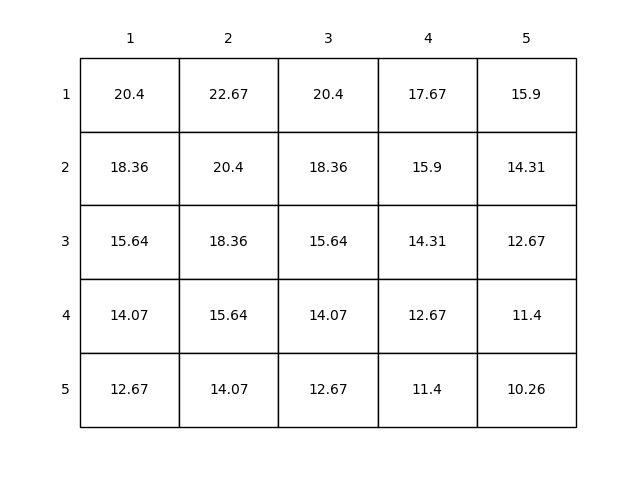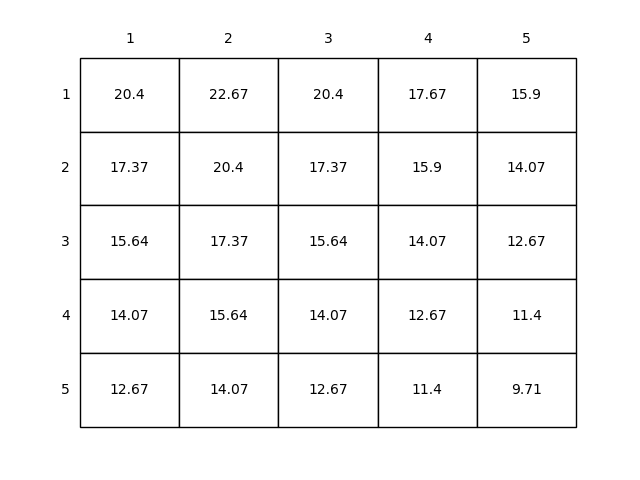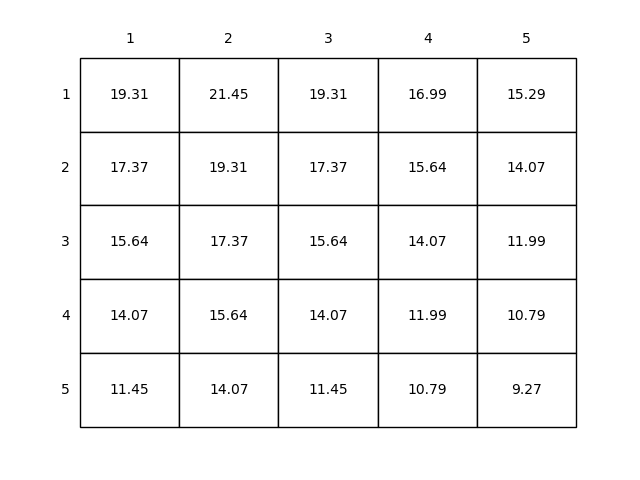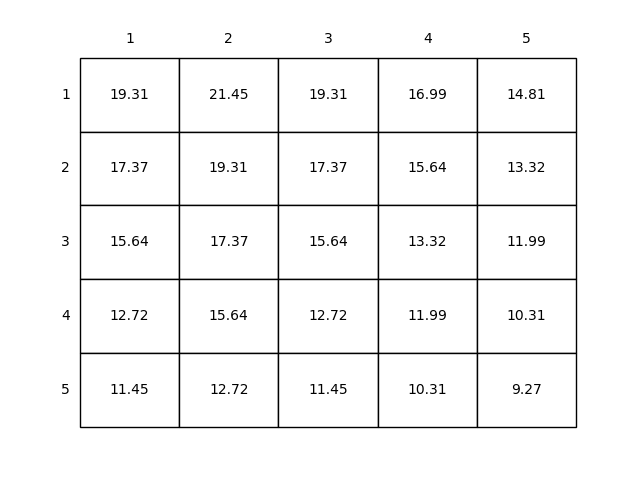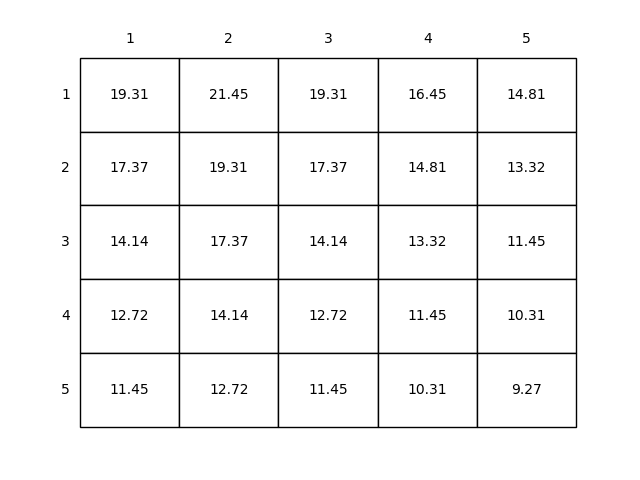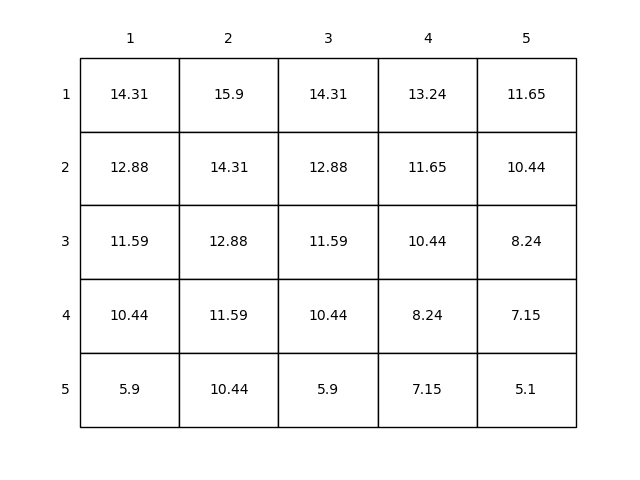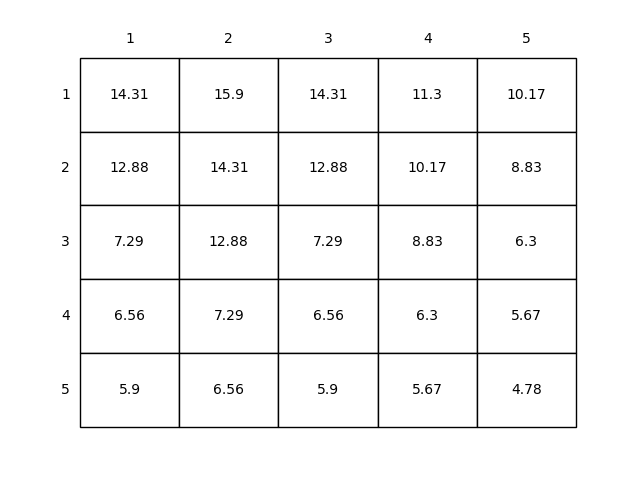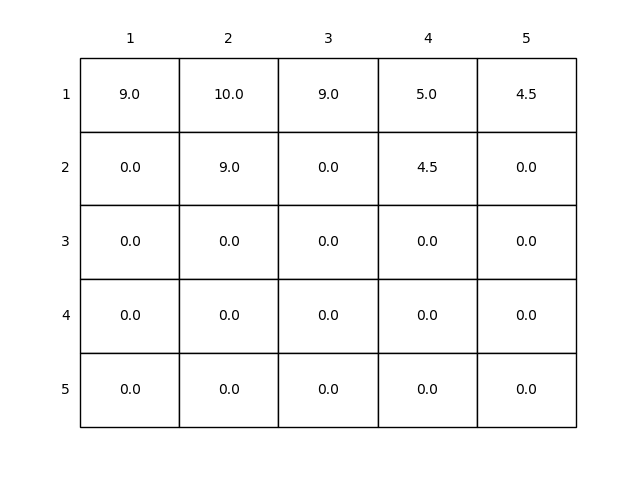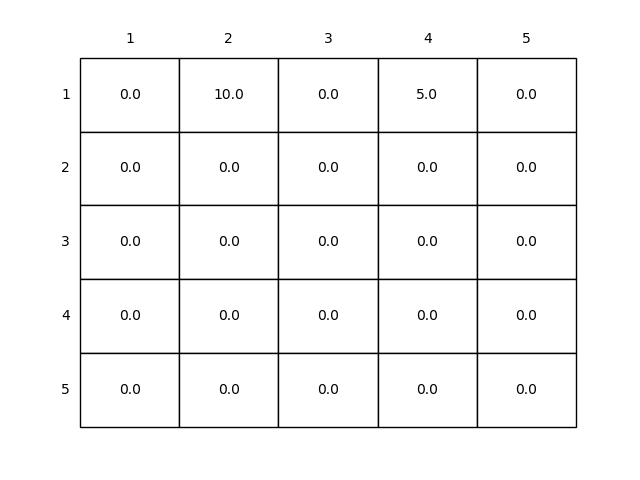

The value function of optimal policy does not contain any negative value because the optimal policy will not tend to go out of boundary

**Question: It seems that optimal value function is taking greedy move at each step. Would this be a problem as it doesn't explore?**

## Try Different Discount Rate

#### Try value update function####

In [5]:
# see what will happen if discount rate is 1
game2 = GridWorld(DISCOUNT = 1)
game2.ValueUpdateBellman()
# basically the value function does not converge, as the very last terms of the infinite sum will not diminish 

KeyboardInterrupt: 

Value function converges after 16 loops


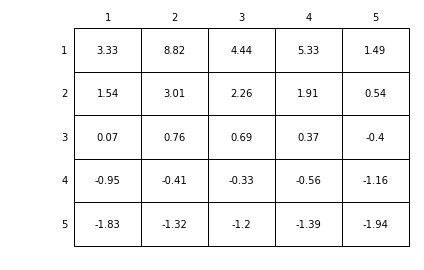

In [4]:
# see what will happen if discount rate is 0.9
game2 = GridWorld(DISCOUNT = 0.9)
game2.ValueUpdateBellman()

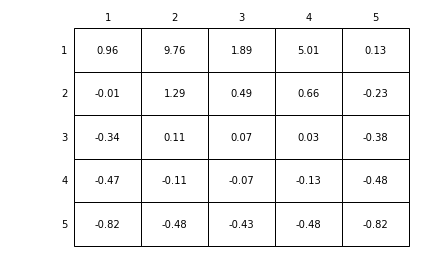

Value function converges after 7 loops


In [2]:
game2 = GridWorld(DISCOUNT=0.5)
game2.ValueUpdateBellman()

#### Try solving optimal Bellman equation####

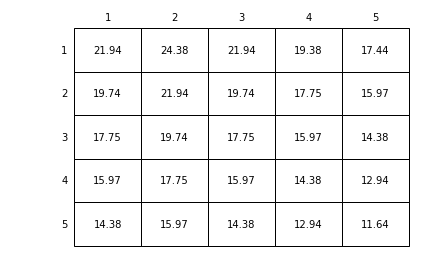

Optimal value function is obtained after 58 loops


In [3]:
game3 = GridWorld(DISCOUNT=0.9)
game3.OptimalValueUpdate()

In [7]:
game3 = GridWorld(DISCOUNT=0.999)
game3.OptimalValueUpdate()

Optimal value function is obtained after 5993 loops


In [9]:
game3 = GridWorld(DISCOUNT=0.5)
game3.OptimalValueUpdate()

Optimal value function is obtained after 10 loops


Basically, it seems that when discount rate is 0.9 or 0.999, the value function of each state shows the exact same pattern. While the discount rate is adjusted to 0.5, the pattern changes. However, the smaller discount rate help the value function converges

<br>
## Try value update on a different policy##

Try a new policy:
1. When for the state that on the boundary, set the probability of walking out of the boundary to be 0.1
2. For the rest state, the probablity is equal on all directions

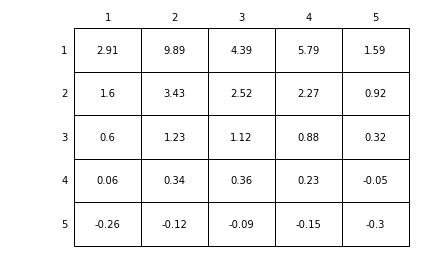

Value function converges after 21 loops


In [4]:
game4 = GridWorld(outProb=0.1)
game4.ValueUpdateBellman()

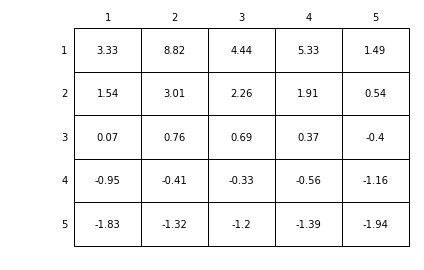

Value function converges after 16 loops


In [5]:
# compare with the original policy
game4 = GridWorld()
game4.ValueUpdateBellman()

*The general value of each state increases, but the pattern of those values remains unchanged* 